In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy import stats
from operator import sub
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("../data/depression.csv").drop(['depressed', 'Survey_id', 'Ville_id'], axis=1)
dataset

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765.0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
1425,1,28,1,4,10,6,15711078,24023054,15506558,10476722,71588707,0,1,0,0,23022095,1021536,0,1823477,47384361.0
1426,1,66,0,0,1,1,42440731,22861940,22562605,12545372,56534257,0,1,0,0,12545373,10454478,0,46444572,10454478.0
1427,1,51,1,1,12,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0


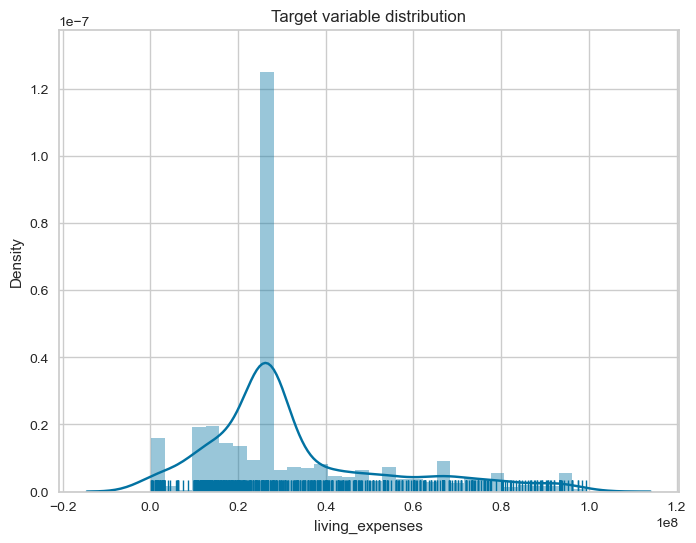

In [3]:
plt.figure(figsize=(8,6))
sns.distplot(dataset['living_expenses'], kde=True, rug=True)
plt.title('Target variable distribution')
plt.show()

In [4]:
X = dataset.drop(['living_expenses'], axis = 1)
Y = dataset['living_expenses']

In [5]:
X_columns = X.columns

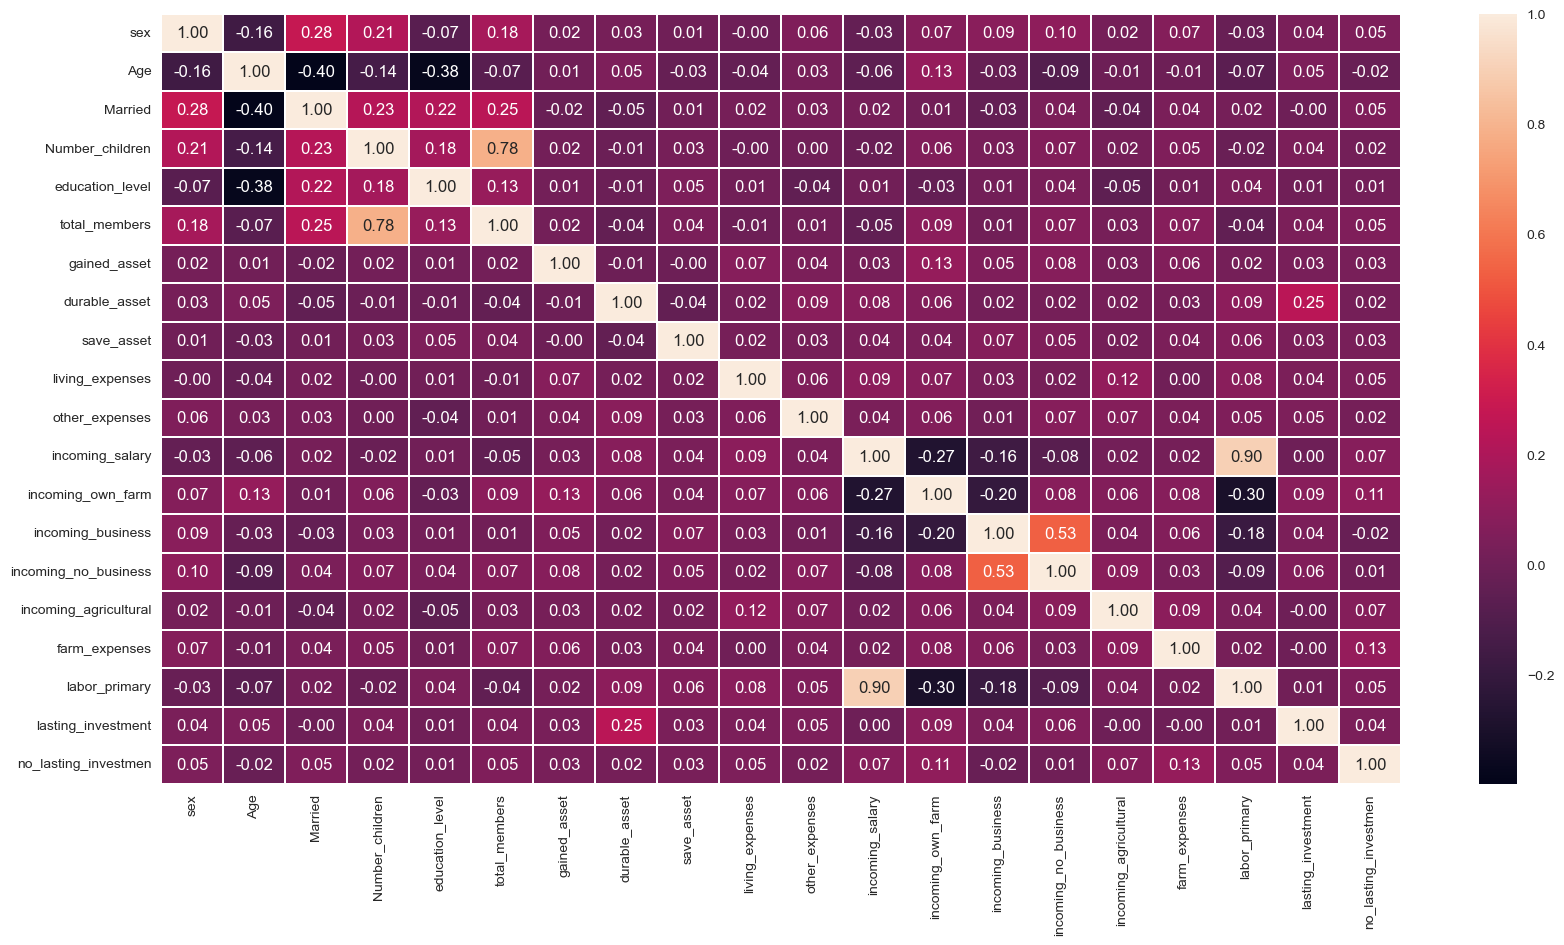

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset[dataset.columns].corr(), annot=True, fmt = ".2f", linewidth = .10)
plt.show()

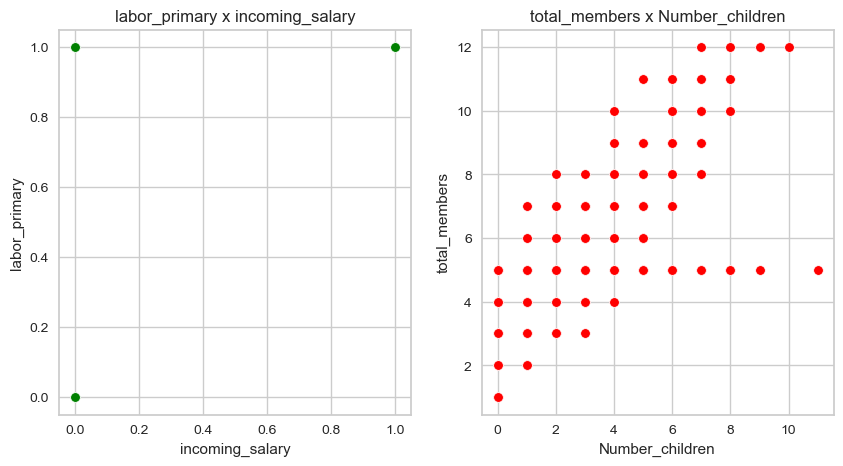

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=dataset, x='incoming_salary', y='labor_primary', ax=plt.gca(), color='green')
plt.title('labor_primary x incoming_salary')
plt.subplot(1,2,2)
sns.scatterplot(data=dataset, x='Number_children', y='total_members', ax=plt.gca(), color='red')
plt.title('total_members x Number_children')
plt.show()

&nbsp;

#### Справување со мултиколинеарност

In [8]:
x = dataset[X_columns]
y = dataset['living_expenses']

In [9]:
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        living_expenses   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              182.5
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                        0.00
Time:                        19:35:20   Log-Likelihood:                         -26107.
No. Observations:                1429   AIC:                                  5.225e+04
Df Residuals:                    1410   BIC:                                  5.235e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [10]:
X = MinMaxScaler().fit_transform(X)

In [11]:
pca = PCA().fit(X)

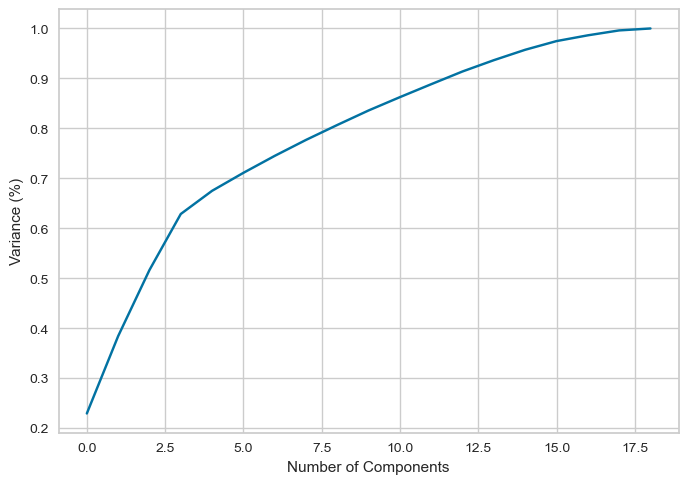

In [12]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22936234, 0.38417873, 0.51649442, 0.62865695, 0.67504738,
       0.71102648, 0.744991  , 0.77695138, 0.80688048, 0.83594056,
       0.86259262, 0.88849937, 0.91399249, 0.93657819, 0.95738235,
       0.97474964, 0.98628667, 0.99611287, 1.        ])

In [14]:
pca.explained_variance_ratio_

array([0.22936234, 0.15481638, 0.1323157 , 0.11216253, 0.04639042,
       0.0359791 , 0.03396452, 0.03196038, 0.02992911, 0.02906007,
       0.02665207, 0.02590674, 0.02549312, 0.02258571, 0.02080415,
       0.01736729, 0.01153703, 0.0098262 , 0.00388713])

In [15]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

In [16]:
pca = PCA(n_components = 16)
X_pca = pca.fit_transform(X)

In [17]:
results = sm.OLS(y, X_pca).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        living_expenses   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.178
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                       0.279
Time:                        19:35:28   Log-Likelihood:                         -26984.
No. Observations:                1429   AIC:                                  5.400e+04
Df Residuals:                    1413   BIC:                                  5.408e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.2)

#### Линеарна регресија со PCA  за справување со мултиколинеарност

In [19]:
lr = LinearRegression().fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [20]:
result_df = pd.DataFrame({"actual":Y_test,"predicted":y_pred})
result_df.head()

,actual,predicted
767,73804164,2.624243e+07
1371,26692283,2.901782e+07
607,262919,3.655167e+07
727,14013449,3.198823e+07
758,10543453,3.064630e+07


In [21]:
print("MAE:",mean_absolute_error(Y_test, y_pred))
print("MSE:",mean_squared_error(Y_test, y_pred))

MAE: 15224861.524133962
MSE: 454179389048769.56


&nbsp;

#### Справување со наклонетост (skewness)

<AxesSubplot:>

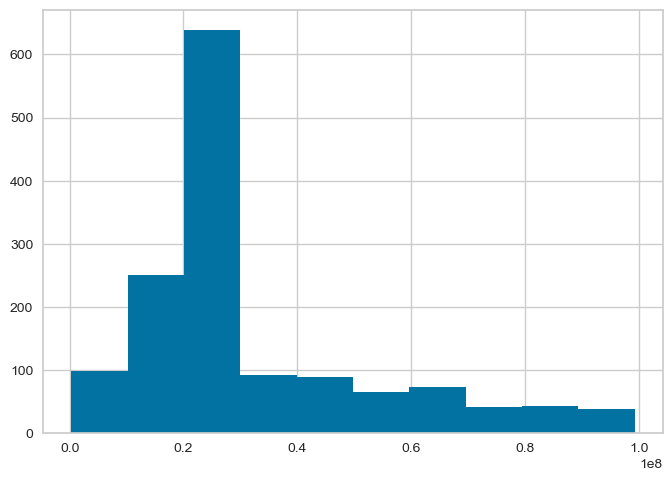

In [22]:
dataset['living_expenses'].hist()

In [23]:
data = dataset.copy()
data['living_expenses'] = stats.boxcox(data['living_expenses'])[0]

<AxesSubplot:>

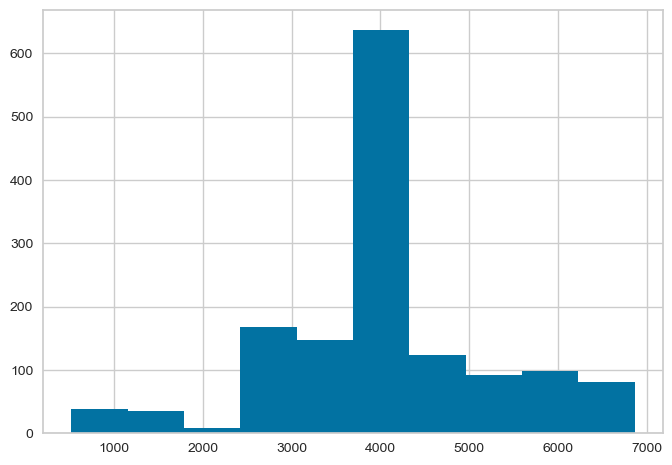

In [24]:
data['living_expenses'].hist()

In [25]:
x2 = data.drop(['living_expenses'], axis = 1)
y2 = data['living_expenses']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.2)

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

&nbsp;

## Linear Regression

In [28]:
model = LinearRegression().fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [29]:
result_df = pd.DataFrame({"actual":Y_test,"predicted":y_pred})
result_df.head()

,actual,predicted
2,3877.414454,3956.417049
471,3215.135599,3917.459081
263,4624.834539,4150.350846
473,3877.414454,3941.679415
1079,5269.302903,4138.750599


In [30]:
coeff_lr = pd.DataFrame(model.coef_, x2.columns, columns=['Coefficient'])
coeff_lr

,Coefficient
sex,-165.382893
Age,-321.656065
Married,39.055853
Number_children,62.118308
education_level,-132.203560
total_members,-293.719373
gained_asset,278.326593
durable_asset,-0.080212
save_asset,45.395935
other_expenses,165.016909


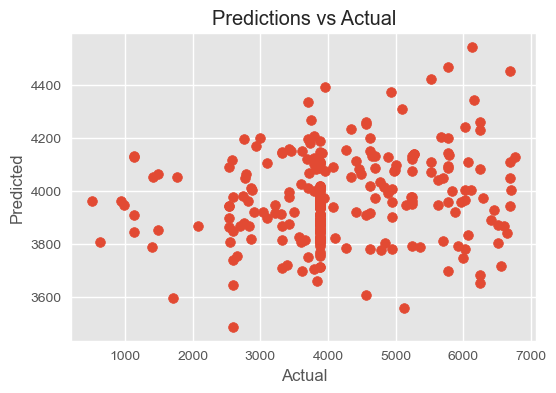

In [31]:
predictions = model.predict(X_test)
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
plt.scatter(Y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

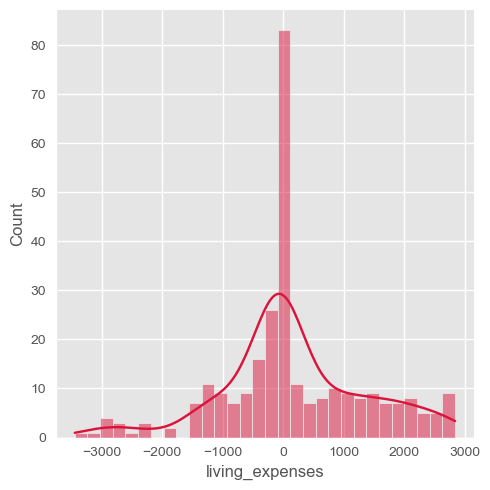

In [32]:
sns.displot((Y_test - predictions), bins=30, kde=True, color='crimson')
plt.show()

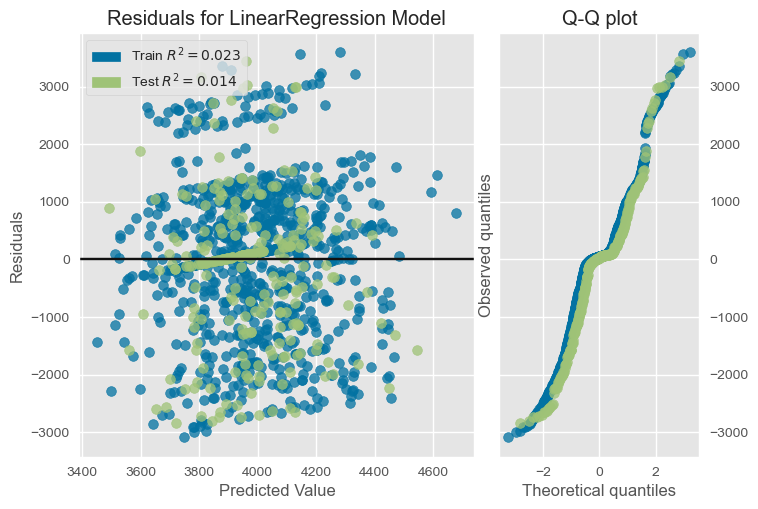

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.show()

In [34]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test, predictions)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(Y_test, predictions)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, predictions))}')
print(f'\nR2 score: {metrics.r2_score(Y_test, predictions)}')

Mean Absolute Error(MAE): 845.9373142150791

Mean Squared Error(MSE): 1478100.2111616568

Root Mean Square Error(RMSE): 1215.7714469264595

R2 score: 0.013703660007648555


&nbsp;

## Regularization

In [35]:
algorithms = []
algorithms.append(Ridge(alpha=1))
algorithms.append(Lasso(alpha=0.1))
algorithms.append(ElasticNet(alpha=0.1, l1_ratio = 0.4))
algorithms.append(BayesianRidge())

data = []
for algo in algorithms:
    algo.fit(X_train, Y_train)
    y_pred = algo.predict(X_test)
    sigma = np.sum((Y_test - algo.predict(X_test))**2) / (X_train.shape[0]-2)
    data.append(({
        'MSE': mean_squared_error(Y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(Y_test, y_pred)),
        'MAE': mean_absolute_error(Y_test, y_pred),
        'R2': r2_score(Y_test, y_pred),
        'model variance': sigma
    }))
    
    
results = pd.DataFrame(data=data, columns=['MSE', 'RMSE', 'MAE', 'R2', 'model variance'],
                       index=['Ridge', 'Lasso', 'ElasticNet', 'BayesianRidge'])

results

,MSE,RMSE,MAE,R2,model variance
Ridge,1.478099e+06,1215.771000,845.816232,0.013704,370496.362255
Lasso,1.477963e+06,1215.715169,845.920950,0.013795,370462.334948
ElasticNet,1.493213e+06,1221.970928,852.148268,0.003619,374284.753178
BayesianRidge,1.523111e+06,1234.143861,868.830691,-0.016331,381778.935729


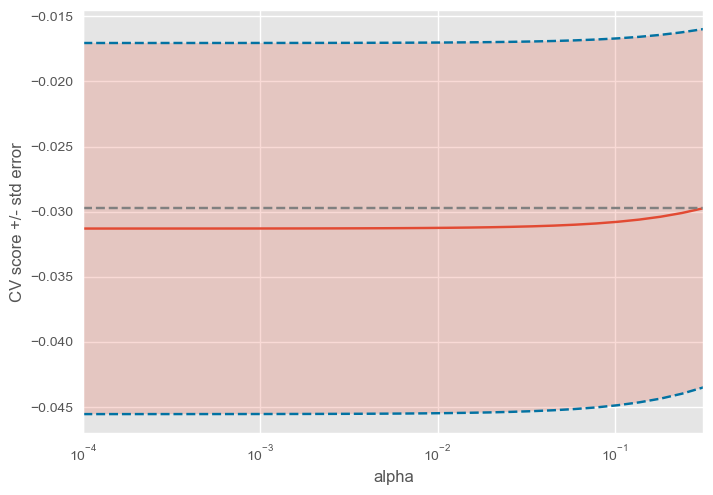

In [36]:
lasso = Lasso(random_state = 0, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

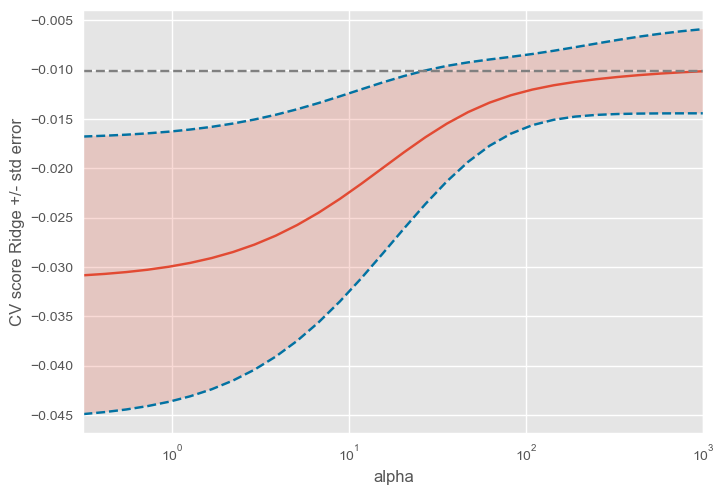

In [37]:
ridge = Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-0.5, 3, 30)

tuned_parameters = [{'alpha': alphas}]

model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
model.fit(X_train, Y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score Ridge +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

&nbsp;

## KNN for Regression

In [38]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [39]:
knn_predictions = knn.predict(X_test)

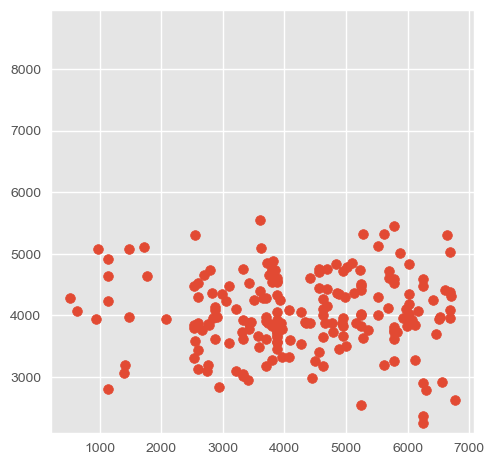

In [40]:
plt.style.use('ggplot')
plt.scatter(Y_test, knn_predictions)
plt.axis('square')
plt.show()

In [41]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test, knn_predictions)}')
print(f'Mean Squared Error(MSE): {metrics.mean_squared_error(Y_test, knn_predictions)}')
print(f'Root Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, knn_predictions))}')
print(f'R2: {metrics.r2_score(Y_test, knn_predictions)}')

Mean Absolute Error(MAE): 872.4293454441105
Mean Squared Error(MSE): 1775445.950952535
Root Mean Square Error(RMSE): 1332.4586113469097
R2: -0.18470711935187545


&nbsp;

## Support Vector Regressor (SVR)

In [42]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    regressor = SVR(kernel=kernel, gamma='auto', tol=0.0001, C=0.001, epsilon=0.0001, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=100)
    regressor.fit(X_train, Y_train)
    
    y_pred = regressor.predict(X_test)
    
    print(f'MSE: {mean_squared_error(Y_test, y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test, y_pred)}')
    print(f'R2: {r2_score(Y_test, y_pred)}\n')

MSE: 2064276.3750061435
MAE: 1111.1571405158993
R2: -0.3774358585613964

MSE: 2064281.8039675925
MAE: 1111.1591882073612
R2: -0.3774394811607078

MSE: 1951022.852292552
MAE: 1062.5237714117047
R2: -0.3018648424014918



&nbsp;

## Random Forest Regressor

In [43]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print(f'MSE: {mean_squared_error(Y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test, y_pred)}')
print(f'R2: {r2_score(Y_test, y_pred)}')

MSE: 1427116.6792294034
MAE: 814.6063091785362
R2: 0.04772359354459421
